用NumPy纯手工实现的ReLU神经网络来拟合一个简单函数 
y=sin(2πx)+0.3x

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm

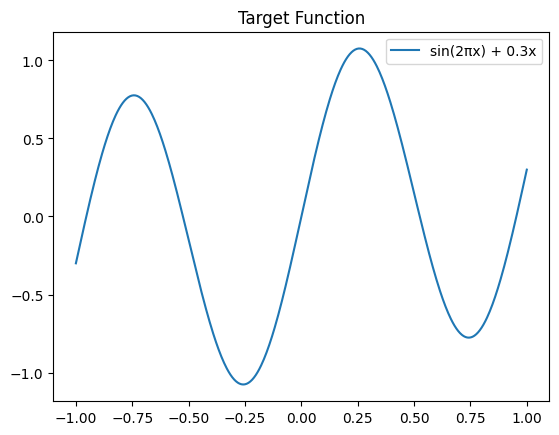

In [6]:
# ===========================
# 1. 目标函数
# ===========================
def targetFunc(x):
    """目标函数: y = sin(2πx) + 0.3x"""
    return np.sin(2 * np.pi * x) + 0.3 * x

# 绘制目标函数
x = np.linspace(-1, 1, 500)
plt.plot(x, targetFunc(x))
plt.legend(["sin(2πx) + 0.3x"])
plt.title("Target Function")
plt.show()

In [7]:
# ===========================
# 2. 生成数据集 & 划分
# ===========================
x = np.linspace(-1, 1, 5000)
y = targetFunc(x)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1)

print(f"Training dataset: {X_train.shape}")
print(f"Validation dataset: {X_val.shape}")
print(f"Test dataset: {X_test.shape}")

Training dataset: (3500,)
Validation dataset: (500,)
Test dataset: (1000,)


In [ ]:
# ===========================
# 3. 模型参数初始化
# ===========================
input_dim = 1
hidden_dim = 16     # 隐藏层神经元数
output_dim = 1

W1 = np.random.randn(hidden_dim, input_dim) * np.sqrt(1 / input_dim)
W2 = np.random.randn(output_dim, hidden_dim) * np.sqrt(1 / hidden_dim)
b1 = np.zeros((hidden_dim, 1))
b2 = np.zeros((output_dim, 1))

cache = {}  # 存储前向传播中的中间变量

In [9]:
# ===========================
# 4. 定义前向传播 & 反向传播
# ===========================
def Linear(W, X, b):
    """线性变换"""
    return np.matmul(W, X) + b

def relu(X):
    """ReLU 激活函数"""
    return np.maximum(0, X)

def forward(x):
    """前向传播"""
    x = x.reshape(1, -1)  # 确保输入是列向量
    cache['out0'] = x
    x = Linear(W1, x, b1)
    cache['out1'] = x
    x = relu(x)
    cache['out2'] = x
    output = Linear(W2, x, b2)
    cache['out3'] = output
    return output

def loss_fn(y_pred, target):
    """均方误差 (MSE) 损失"""
    loss = np.mean((y_pred - target) ** 2)
    cache['loss'] = (y_pred - target) / len(y_pred)
    return loss

def backward(lr, batch_size):
    """反向传播"""
    global W1, W2, b1, b2

    delta2 = 1 / batch_size * cache['loss']
    dW2 = 1 / batch_size * np.matmul(delta2, cache['out2'].T)
    db2 = 1 / batch_size * np.sum(delta2, axis=1, keepdims=True)

    delta1 = np.matmul(W2.T, delta2) * (cache['out1'] > 0)
    dW1 = 1 / batch_size * np.matmul(delta1, cache['out0'].T)
    db1 = 1 / batch_size * np.sum(delta1, axis=1, keepdims=True)

    # 更新参数
    W1 -= lr * dW1
    W2 -= lr * dW2
    b1 -= lr * db1
    b2 -= lr * db2


In [16]:
# ===========================
# 5. 训练
# ===========================
def train(X, y, epochs=5000, batch_size=32, lr=0.01, verbose_ep=1000):
    """训练神经网络"""
    X = X.reshape(-1, 1)  # 确保X是列向量
    y = y.reshape(-1, 1)  # 确保y是列向量

    for epoch in tqdm(range(epochs)):
        rec_loss = 0

        for i in range(0, len(X), batch_size):
            X_batched = X[i:i + batch_size]
            y_batched = y[i:i + batch_size]

            y_pred = forward(X_batched.T)  # 确保输入是列向量
            loss = loss_fn(y_pred, y_batched.T)
            rec_loss += loss * len(X_batched)  # 按 batch_size 计算损失总和

            backward(lr, batch_size)

        # 打印平均损失
        if epoch % verbose_ep == 0:
            print(f"Epoch:{epoch}, Loss:{rec_loss / len(X)}")

train(X_train, y_train, epochs=5000, batch_size=32, lr=0.01, verbose_ep=1000)


  0%|          | 25/5000 [00:00<00:38, 129.20it/s]

Epoch:0, Loss:0.14334027336421604


 20%|██        | 1022/5000 [00:06<00:26, 152.46it/s]

Epoch:1000, Loss:0.14067418888927258


 40%|████      | 2023/5000 [00:13<00:18, 159.97it/s]

Epoch:2000, Loss:0.1398850866411085


 60%|██████    | 3020/5000 [00:20<00:12, 155.65it/s]

Epoch:3000, Loss:0.13960500231793643


 80%|████████  | 4024/5000 [00:27<00:06, 157.00it/s]

Epoch:4000, Loss:0.13949417375287596


100%|██████████| 5000/5000 [00:34<00:00, 146.65it/s]


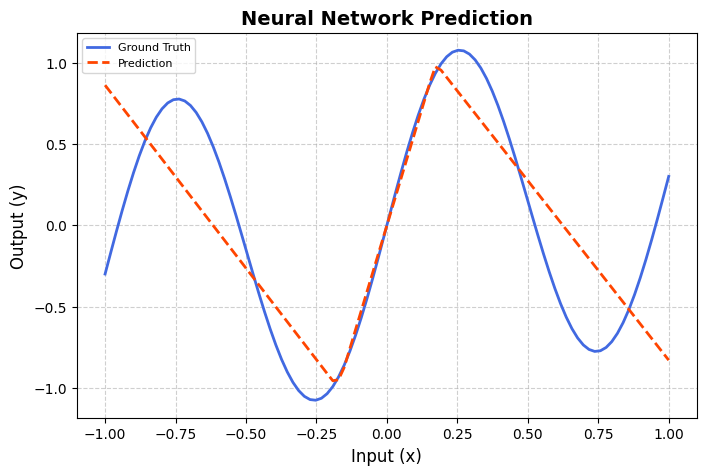

In [20]:
# ===========================
# 6. 评估 & 预测
# ===========================
def predict(ranger):
    """测试模型 & 可视化结果"""
    x_plot = np.linspace(ranger[0], ranger[1], 100)                             # 生成 100 个点
    y_pred = np.array([forward(np.array([[i]])) for i in x_plot]).squeeze()     # 计算预测值并压缩维度

    plt.figure(figsize=(8, 5), dpi=100)  
    plt.plot(x_plot, targetFunc(x_plot), label="Ground Truth", color="royalblue", linewidth=2)
    plt.plot(x_plot, y_pred, label="Prediction", color="orangered", linestyle="dashed", linewidth=2)
    
    plt.xlabel("Input (x)", fontsize=12)
    plt.ylabel("Output (y)", fontsize=12)
    plt.title("Neural Network Prediction", fontsize=14, fontweight="bold")
    
    plt.legend(loc="upper left", fontsize=8)
    plt.grid(True, linestyle="--", alpha=0.6)  
    
    plt.show()

predict([-1, 1])